<a href="https://colab.research.google.com/github/YihanMou0511/Machine-Learning/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [ ]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [ ]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 3 features you think are important. Case_status is your target variable


In [ ]:
df_select=df[['case_status','class_of_admission','country_of_citizenship','us_economic_sector']].dropna()

In [ ]:
df_select

,case_status,class_of_admission,country_of_citizenship,us_economic_sector
20577,Certified-Expired,EWI,ECUADOR,Automotive
20578,Certified,H-1B,INDIA,Advanced Mfg
20579,Certified,L-1,PHILIPPINES,Advanced Mfg
20580,Certified-Expired,H-1B,INDIA,Advanced Mfg
20581,Certified,H-1B,INDIA,Advanced Mfg
...,...,...,...,...
135261,Withdrawn,H-1B,RUSSIA,IT
135262,Withdrawn,H-1B,CHINA,Retail
135263,Withdrawn,H-1B,ISRAEL,Other Economic Sector
135264,Withdrawn,H-1B,TURKEY,Finance


# 3.) Clean your data for a decision tree


In [ ]:
x=pd.get_dummies(data=df_select.drop(['case_status'],axis=1), 
                       columns = df_select.drop(['case_status'],axis=1).columns)
y=df_select['case_status']

In [ ]:
x

,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_D-1,class_of_admission_E-1,class_of_admission_E-2,...,us_economic_sector_Energy,us_economic_sector_Finance,us_economic_sector_Geospatial,us_economic_sector_Health Care,us_economic_sector_Homeland Security,us_economic_sector_Hospitality,us_economic_sector_IT,us_economic_sector_Other Economic Sector,us_economic_sector_Retail,us_economic_sector_Transportation
20577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
135262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
135263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
135264,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

20577     Certified-Expired
20578             Certified
20579             Certified
20580     Certified-Expired
20581             Certified
                ...        
135261            Withdrawn
135262            Withdrawn
135263            Withdrawn
135264            Withdrawn
135266            Withdrawn
Name: case_status, Length: 104087, dtype: object

# 4.) Fit and plot a decision tree of depth 3


In [ ]:
from sklearn import tree

In [ ]:
clf=tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'class_of_admission_EWI <= 0.5\ngini = 0.613\nsamples = 104087\nvalue = [45712, 44839, 7119, 6417]\nclass = Certified-Expired'),
 Text(0.25, 0.625, 'class_of_admission_B-2 <= 0.5\ngini = 0.612\nsamples = 103501\nvalue = [45582, 44633, 6890, 6396]\nclass = Certified-Expired'),
 Text(0.125, 0.375, 'class_of_admission_H-1B <= 0.5\ngini = 0.61\nsamples = 102680\nvalue = [45379, 44346, 6624, 6331]\nclass = Certified-Expired'),
 Text(0.0625, 0.125, 'gini = 0.643\nsamples = 14439\nvalue = [6010, 5936, 1382, 1111]\nclass = Certified-Expired'),
 Text(0.1875, 0.125, 'gini = 0.604\nsamples = 88241\nvalue = [39369, 38410, 5242, 5220]\nclass = Certified-Expired'),
 Text(0.375, 0.375, 'us_economic_sector_Construction <= 0.5\ngini = 0.705\nsamples = 821\nvalue = [203, 287, 266, 65]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.705\nsamples = 747\nvalue = [189, 270, 230, 58]\nclass = Certified'),
 Text(0.4375, 0.125, 'gini = 0.666\nsamples = 74\nvalue = [14, 17, 36, 7]\nclass 

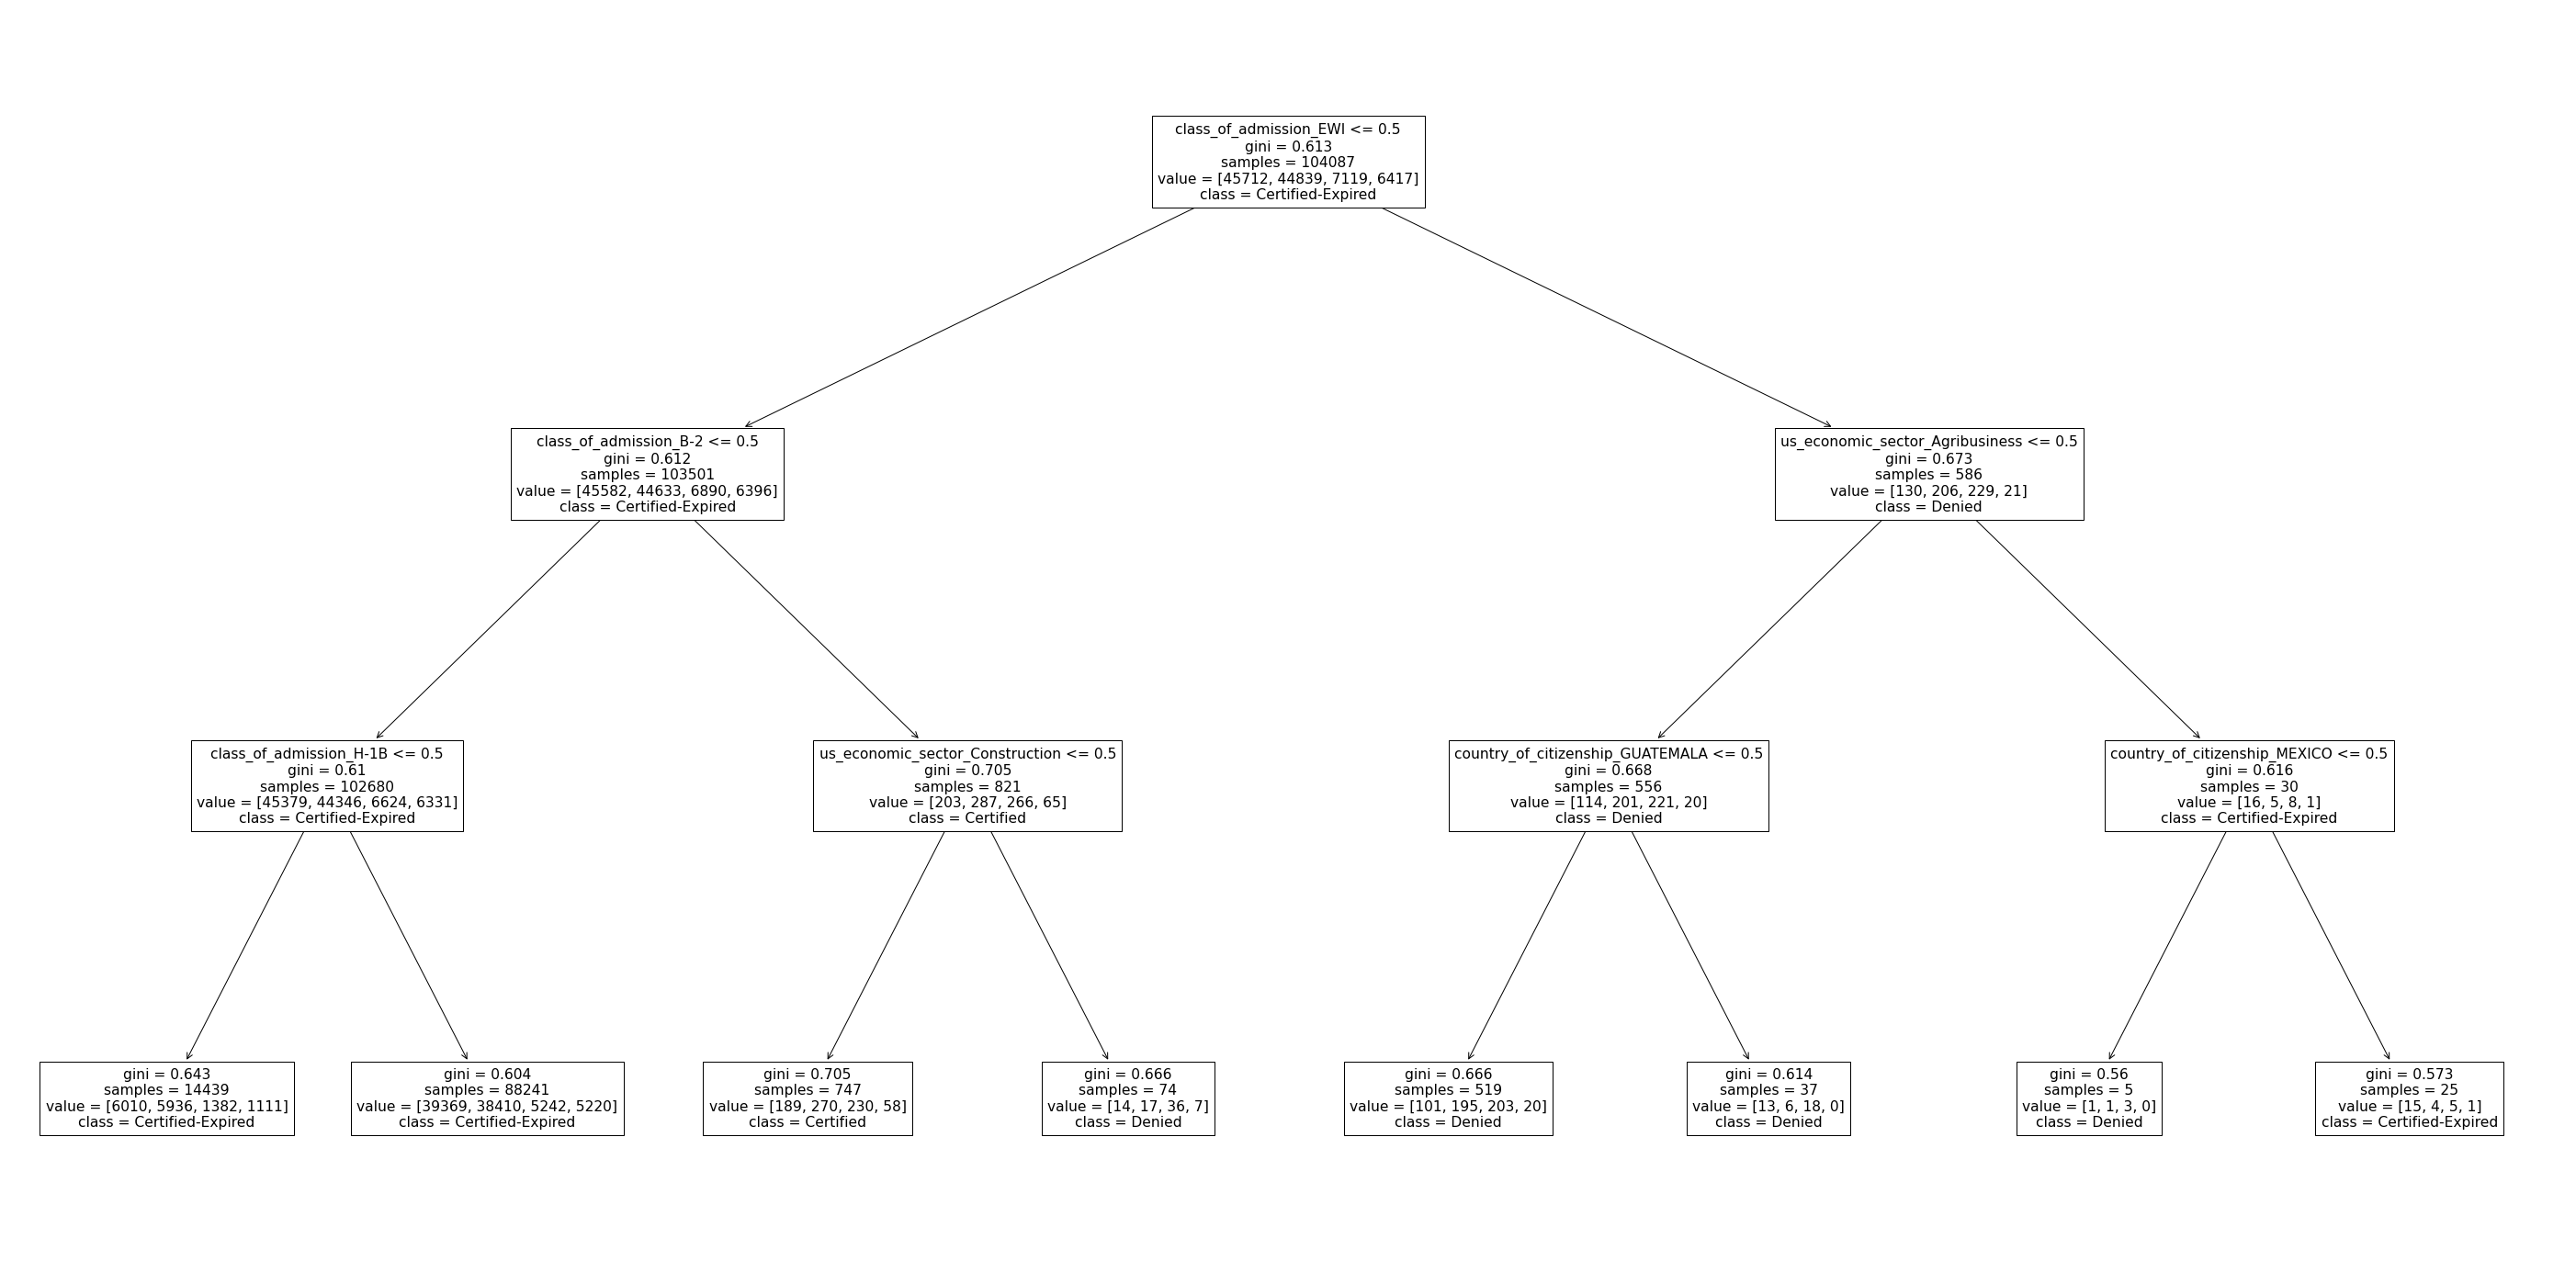

In [ ]:
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=x.columns,class_names=y.unique().tolist())

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node has a sample of 88241. And it shows that under this model, if the class of admission is H1B, the case status would be classified as certified-expired.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
max_depths=[1,2,3,4,5,6,7,8,9,10]
outputs=[]

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)
for md in max_depths:
  clf=tree.DecisionTreeClassifier(max_depth=md)
  clf.fit(x_train,y_train)

  oos_accuracy=accuracy_score(y_test, clf.predict(x_test))
  outputs.append(oos_accuracy)
outputs

[0.43913920645595156,
 0.44016396067505686,
 0.43945944214942195,
 0.44042014922983314,
 0.44144490344893844,
 0.4441669068434368,
 0.44442309539821306,
 0.4449354725077657,
 0.44749735805552887,
 0.4477855701796522]

The best max_depth for out-of sample accuracy is 10.